In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [18]:
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [20]:
X = train_df[features]
y = train_df[target]
X_test_final = test_df[features]

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {'LinearRegression': LinearRegression()}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)
    print(f"\n{name}")
    print("  Mean Squared Error:", mse)
    print("  R-squared Score:", r2)


LinearRegression
  Mean Squared Error: 2806426667.247853
  R-squared Score: 0.6341189942328371


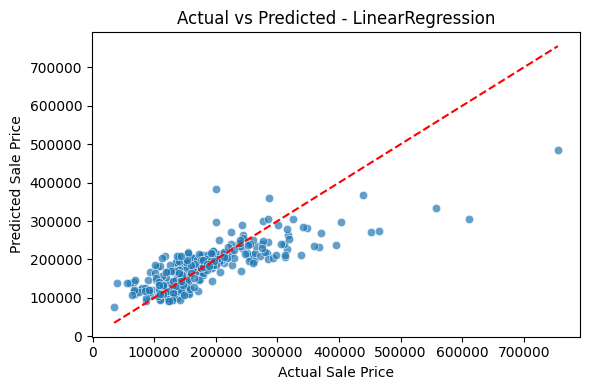

In [30]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_val, y=y_pred_val, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title(f"Actual vs Predicted - {name}")
plt.tight_layout()
plt.show()

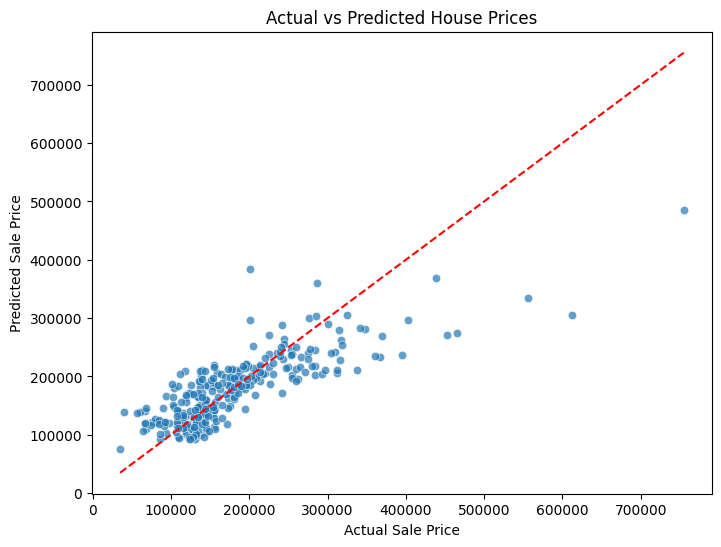

In [27]:
final_model = LinearRegression()
final_model.fit(X, y)
test_preds = final_model.predict(X_test_final)


In [28]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})

In [29]:
submission_path = 'D:\Guvi\Git\SCT_ML_Projects/submission_ridge.csv'
submission.to_csv(submission_path, index=False)
print(f"✅ Final Ridge predictions saved to '{submission_path}'")

✅ Final Ridge predictions saved to 'D:\Guvi\Git\SCT_ML_Projects/submission_ridge.csv'


<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\navee\AppData\Local\Temp\ipykernel_23424\692983696.py:1: SyntaxWarning: invalid escape sequence '\G'
  submission_path = 'D:\Guvi\Git\SCT_ML_Projects/submission_ridge.csv'
